Goal: Focus on the first steps of a data science project

- Analyze by describing the data
- *Analyze by pivoting features*
- Analyze by visualizing the data
- Wrangle the data (correcting, creating, and completing data)

Visit the related Kaggle competition page [here](https://www.kaggle.com/competitions/spaceship-titanic/overview)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv('train_spaceship_titanic.csv')
test_df = pd.read_csv('test_spaceship_titanic.csv')

combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

### Analyze by describing the data

A first description of the features is available [here](https://www.kaggle.com/competitions/spaceship-titanic/data)

In [3]:
print(train_df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [4]:
combined_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Missing values
print(f"Missing values in train: \n {train_df.isnull().sum()}")
print(f"Missing values in test: \n {test_df.isnull().sum()}")

Missing values in train: 
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Missing values in test: 
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [6]:
combined_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

In [7]:
print("Checking for duplicates")
print(f"Number of duplicates in the train set: \n {train_df.duplicated().sum()}")
print(f"Number of duplicates in the test set: \n {test_df.duplicated().sum()}")

Checking for duplicates
Number of duplicates in the train set: 
 0
Number of duplicates in the test set: 
 0


### Preliminary data findings
- Categorical features: HomePlanet, CryoSleep, Cabin, Destination, VIP, Transported
- Numerical features: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- Other: PassengerId (potentially a valuable feature as this indicates to what group a passenger belongs to), Name

- 
<span style="color:red">**We need to come up with a strategy for missing data**</span>.

<span style="color:red">**To be able to use multiple ML methods, we need to transform to be numeric (int64 or float64)**</span>.

### Preliminary data analysis

In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_df.describe(include=['O', 'bool'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


- With >75% of the passengers younger than 38, passengers were quite young
- More than half of the passengers did not spend anything on luxury amenities
- On average, people spend most on the `FoodCourt` category
- Not all names are unique
- Most people weren't VIPs
- 'TRAPPIST-1E' was the most popular destination
- The highest number of people in a cabin is 8
- Most people were not in CryoSleep
- Most people have Earth as their `HomePlanet`
- Just over 50% of the passengers in the training data set survived

### Analyze by visualizing the data

- Passengers between 0-18 years old had a higher chance of being transported
- Passengers between 20-25 years old had a slightly higher chance of not being transported
- Passengers over 25 years old were about equally likely to be transported than not

<span style="color:red">**Apply binning/banding for Age and explain why this is 'nice' for our analysis**</span>.

Text(0.5, 1.0, 'Age distribution')

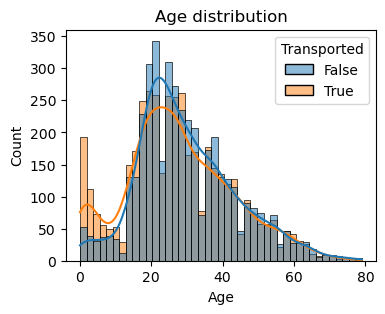

In [10]:
fig, ax = plt.subplots(figsize=(4,3))

sns.histplot(data=train_df, x='Age', hue="Transported", kde=True)
ax.set_title("Age distribution")

From our preliminary analysis, we know that the luxury amenities are heavily skewed over the passengers, therefore, I am 'zooming in on the plots

KeyboardInterrupt: 

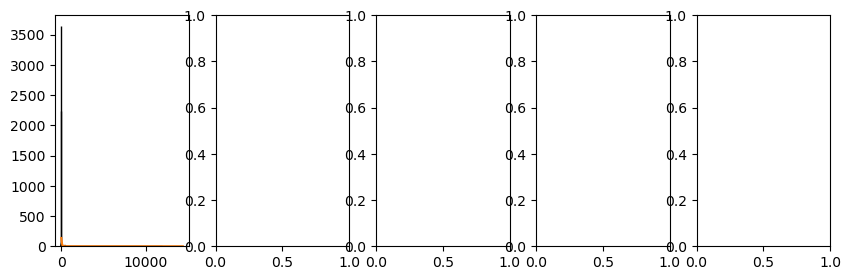

In [11]:
luxury_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(1, len(luxury_features), figsize=(10, 3))

for i, feature in enumerate(luxury_features):
    sns.histplot(data=train_df, x=feature, hue="Transported", kde=True, ax=ax[i])

